In [1]:
# 📌 1. Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

Matplotlib is building the font cache; this may take a moment.


In [2]:
# 📌 2. Load Dataset
df = pd.read_csv('../data/customer_data.csv')
df.head()

,Age,Gender,Purchase Amount,Review Rating,Purchase Count,Subscription Status,Discount Applied,Product Category
0,25,Male,120.50,4,5,Yes,Yes,Electronics
1,34,Female,89.99,3,3,No,No,Fashion
2,45,Female,250.00,5,10,Yes,Yes,Home Appliances
3,23,Male,49.99,2,2,No,Yes,Fashion
4,38,Female,180.75,5,8,Yes,No,Electronics


In [3]:
# 📌 3. Basic Info
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  10 non-null     int64  
 1   Gender               10 non-null     object 
 2   Purchase Amount      10 non-null     float64
 3   Review Rating        10 non-null     int64  
 4   Purchase Count       10 non-null     int64  
 5   Subscription Status  10 non-null     object 
 6   Discount Applied     10 non-null     object 
 7   Product Category     10 non-null     object 
dtypes: float64(1), int64(3), object(4)
memory usage: 772.0+ bytes


Age                    0
Gender                 0
Purchase Amount        0
Review Rating          0
Purchase Count         0
Subscription Status    0
Discount Applied       0
Product Category       0
dtype: int64

In [4]:
# 📌 4. Data Cleaning
df.fillna(method='ffill', inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16848\2589227926.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [6]:
# 📌 5. Encode Categorical Columns
cat_cols = ['Gender', 'Subscription Status', 'Discount Applied', 'Product Category']
label_encoders = {}

for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

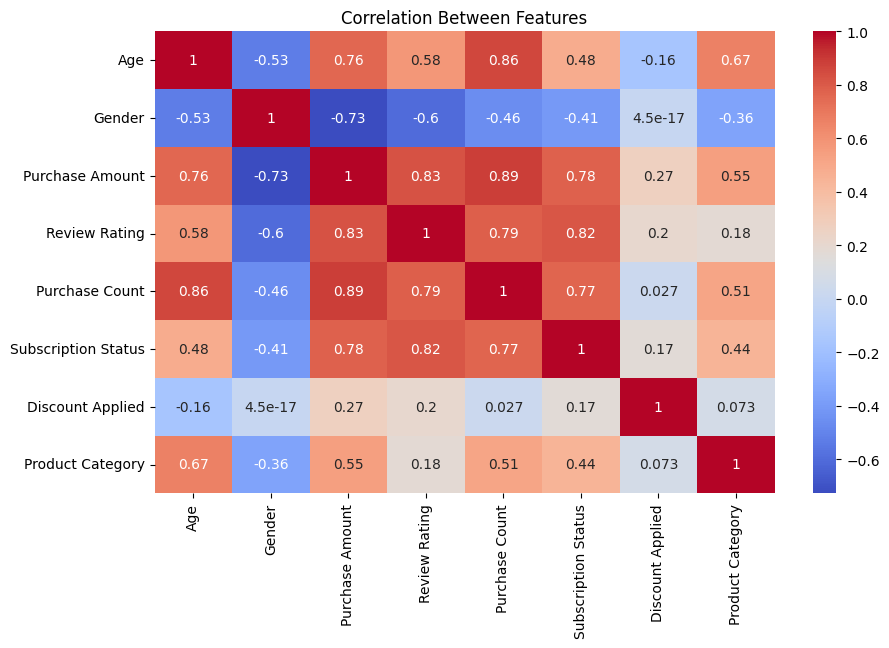

In [7]:
# 📌 6. Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Features")
plt.show()

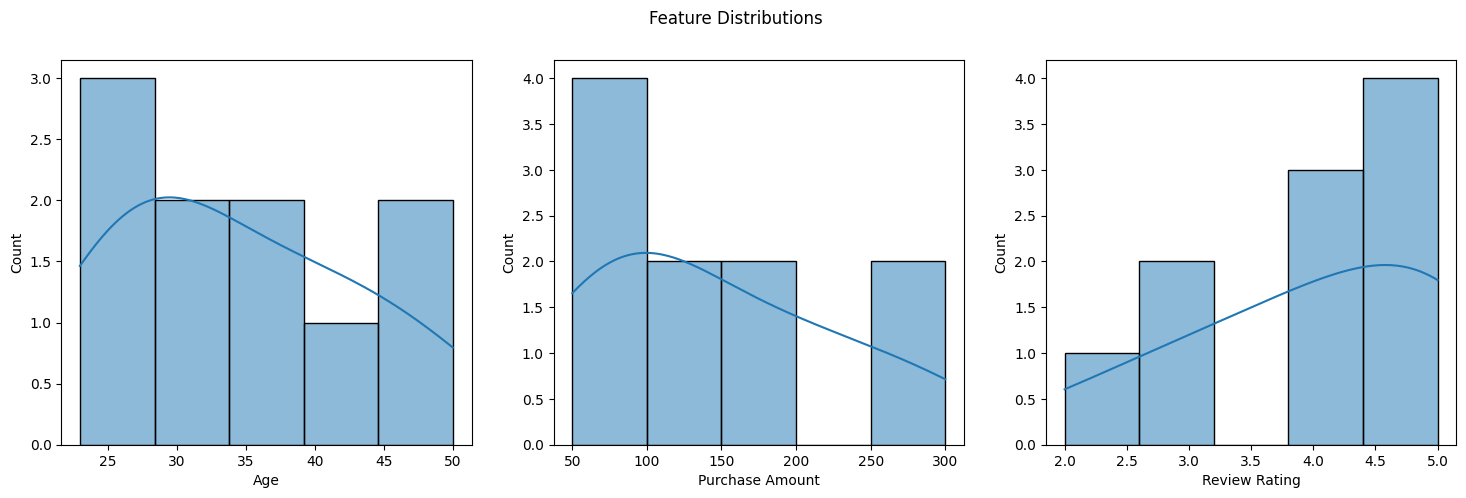

In [8]:
# 📌 7. Data Distribution
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(df['Age'], kde=True, ax=axs[0])
sns.histplot(df['Purchase Amount'], kde=True, ax=axs[1])
sns.histplot(df['Review Rating'], kde=True, ax=axs[2])
plt.suptitle("Feature Distributions")
plt.show()

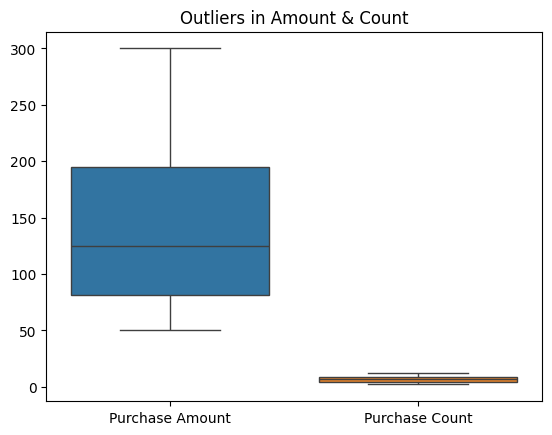

In [9]:
# 📌 8. Outliers
sns.boxplot(data=df[['Purchase Amount', 'Purchase Count']])
plt.title("Outliers in Amount & Count")
plt.show()

In [10]:
# 📌 9. Feature & Label Split
X = df.drop('Product Category', axis=1)
y = df['Product Category']

In [11]:
# 📌 10. Normalize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
# 📌 11. Balance Dataset with SMOTE
smote = SMOTE(random_state=42, k_neighbors=1)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)


In [15]:
# 📌 12. Split Train/Test
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [16]:
# 📌 13. Train & Evaluate Models
models = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    results[name] = report['accuracy']
    print(f"--- {name} ---")
    print(classification_report(y_test, y_pred))

--- KNN ---
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       1.0
           2       0.00      0.00      0.00       0.0
           3       0.00      0.00      0.00       1.0

    accuracy                           0.00       3.0
   macro avg       0.00      0.00      0.00       3.0
weighted avg       0.00      0.00      0.00       3.0

--- Decision Tree ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.50      1.00      0.67         1
           3       0.00      0.00      0.00         1

    accuracy                           0.67         3
   macro avg       0.50      0.67      0.56         3
weighted avg       0.50      0.67      0.56         3

--- Logistic Regression ---
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1 

c:\Nethru\Predicting-Product-Category-Customer-Will-Buy\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Nethru\Predicting-Product-Category-Customer-Will-Buy\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Nethru\Predicting-Product-Category-Customer-Will-Buy\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_pr

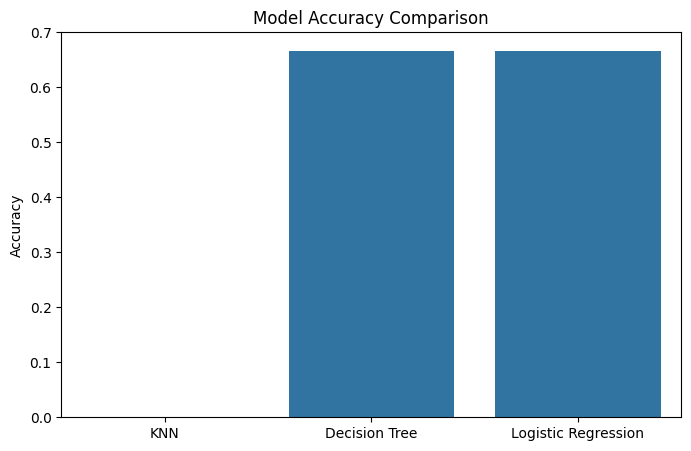

In [17]:
# 📌 14. Compare Model Accuracies
plt.figure(figsize=(8, 5))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()